In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [7]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [9]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})

In [10]:
df.head()

,values
2004-01,2
2004-02,1
2004-03,0
2004-04,1
2004-05,0


In [11]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [14]:
np.random.shuffle(trends)

In [15]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [16]:
trend_df = trend_dfs[0]

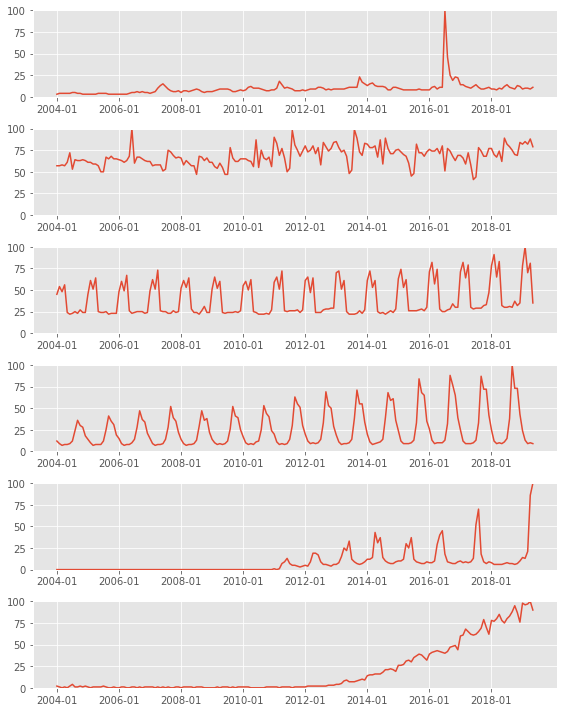

In [17]:
import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

In [18]:
trends

[{'trend_name': 'pokemon', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'uk'},
 {'trend_name': 'taxes', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'us'},
 {'trend_name': 'game-of-thrones', 'country_code': 'us'},
 {'trend_name': 'data-science', 'country_code': 'us'}]

In [48]:
trends[0]['trend_name']

'pokemon'

In [19]:
taxes_df = load_trend('taxes')
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12

In [26]:
taxes_df['month'] += 1

In [30]:
taxes_df.head(14)

,values,i,month
2004-01,45,0,1
2004-02,54,1,2
2004-03,48,2,3
2004-04,56,3,4
2004-05,24,4,5
2004-06,22,5,6
2004-07,23,6,7
2004-08,25,7,8
2004-09,23,8,9
2004-10,27,9,10


In [31]:
trend_model = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

In [32]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(taxes_df[['month']])
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [33]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

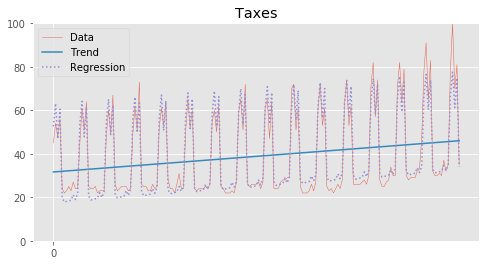

In [34]:
trend_df = taxes_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Taxes')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

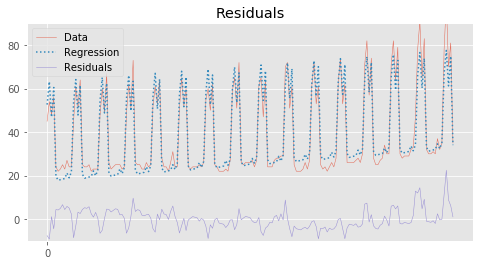

In [35]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [36]:
pokemon_df = load_trend('pokemon')
pokemon_df['i'] = np.arange(len(pokemon_df))
pokemon_df['month'] = pokemon_df['i'] % 12

In [39]:
pokemon_df['month'] += 1

In [41]:
trend_model = LinearRegression()
trend_model.fit(pokemon_df[['i']], pokemon_df['values'])
trend_line = trend_model.predict(pokemon_df[['i']])

month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(pokemon_df[['month']])
month_data = month_encoder.transform(pokemon_df[['month']]).toarray()

lr = LinearRegression()
data = np.hstack((pokemon_df[['i']].values, month_data))
lr.fit(data, pokemon_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

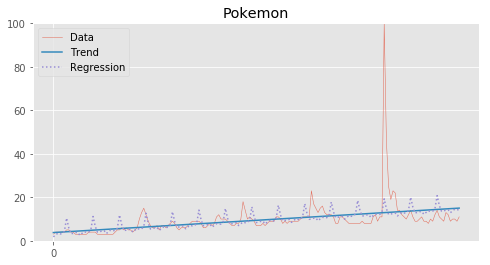

In [42]:
trend_df = pokemon_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Pokemon')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

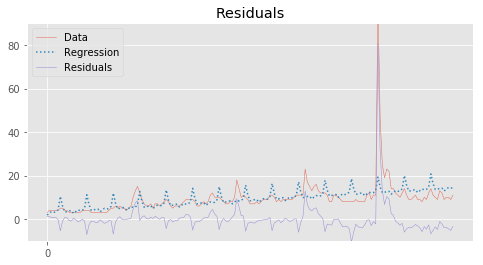

In [43]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [84]:
got = trends[4]['trend_name']

In [53]:
trends

[{'trend_name': 'pokemon', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'uk'},
 {'trend_name': 'taxes', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'us'},
 {'trend_name': 'game-of-thrones', 'country_code': 'us'},
 {'trend_name': 'data-science', 'country_code': 'us'}]

In [114]:
def fit_trend_model(trend_df):
    trend_df['i'] = np.arange(len(trend_df))
    trend_df['month'] = trend_df['i'] % 12
    
    trend_model = LinearRegression()
    trend_model.fit(trend_df[['i']], trend_df['values'])
    trend_line = trend_model.predict(trend_df[['i']])

    month_encoder = OneHotEncoder(categories='auto')
    month_encoder.fit(trend_df[['month']])
    month_data = month_encoder.transform(trend_df[['month']]).toarray()

    lr = LinearRegression()
    data = np.hstack((trend_df[['i']].values, month_data))
    lr.fit(data, trend_df['values'])
    
    return lr 

def get_prediction_for_trend(topic, country):
    
    trend_df = load_trend(topic, country)
    lr = fit_trend_model(trend_df)
    lr_pred = lr.predict(data) # Predixctive model based on i and month
    return lr_pred

lr_pred = get_prediction_for_trend('football', 'uk')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

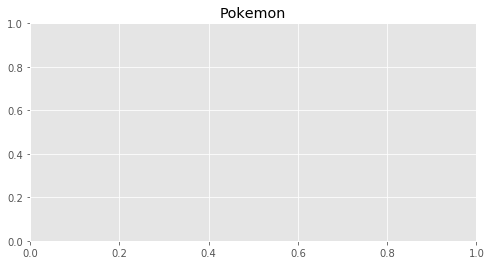

In [86]:
trend_df = lr_pred
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Pokemon')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()


In [99]:
got_df = load_trend('game-of-thrones')
got_df['i'] = np.arange(len(got_df))
got_df['month'] = got_df['i'] % 12

In [100]:
got_df['month'] += 1

In [102]:
trend_model = LinearRegression()
trend_model.fit(got_df[['i']], got_df['values'])
trend_line = trend_model.predict(got_df[['i']])


In [104]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(got_df[['month']])
month_data = month_encoder.transform(got_df[['month']]).toarray()

lr = LinearRegression()
data = np.hstack((got_df[['i']].values, month_data))
lr.fit(data, got_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

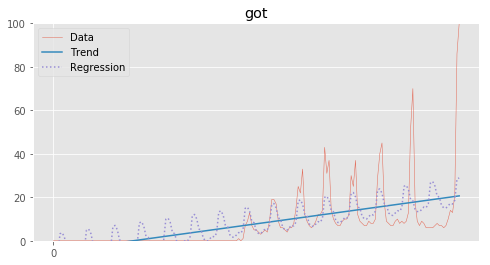

In [105]:
trend_df = got_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('got')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

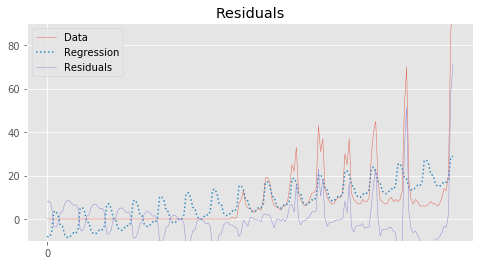

In [106]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [108]:
ds_df = load_trend('data-science')
ds_df['i'] = np.arange(len(ds_df))
ds_df['month'] = ds_df['i'] % 12

In [109]:
ds_df['month'] += 1

In [111]:
trend_model = LinearRegression()
trend_model.fit(ds_df[['i']], ds_df['values'])
trend_line = trend_model.predict(ds_df[['i']])

month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(ds_df[['month']])
month_data = month_encoder.transform(ds_df[['month']]).toarray()

lr = LinearRegression()
data = np.hstack((ds_df[['i']].values, month_data))
lr.fit(data, ds_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

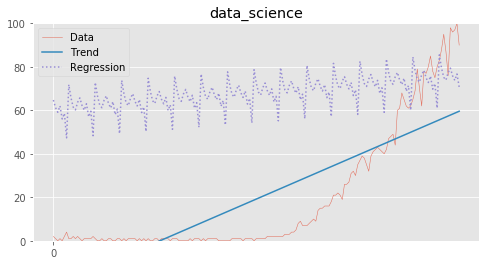

In [125]:
trend_df = ds_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('data_science')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

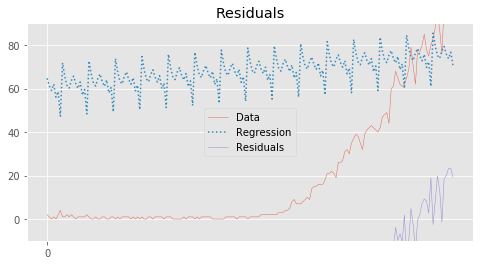

In [128]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [123]:
ds_df1 = ds_df.loc[~(ds_df['i'] <= 107)]

In [130]:
ds_df1

,values,i,month
2013-01,4,108,1
2013-02,4,109,2
2013-03,5,110,3
2013-04,8,111,4
2013-05,9,112,5
2013-06,7,113,6
2013-07,7,114,7
2013-08,7,115,8
2013-09,8,116,9
2013-10,9,117,10


In [132]:
ds_df1['i'] = np.arange(len(ds_df1))
ds_df1['month'] = ds_df1['i'] % 12

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
trend_model = LinearRegression()
trend_model.fit(ds_df1[['i']], ds_df1['values'])
trend_line = trend_model.predict(ds_df1[['i']])

month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(ds_df1[['month']])
month_data = month_encoder.transform(ds_df1[['month']]).toarray()

lr = LinearRegression()
data = np.hstack((ds_df1[['i']].values, month_data))
lr.fit(data, ds_df1['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

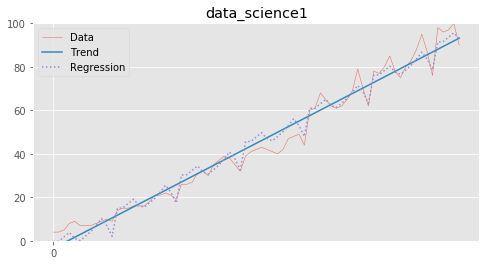

In [134]:
trend_df = ds_df1
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('data_science1')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

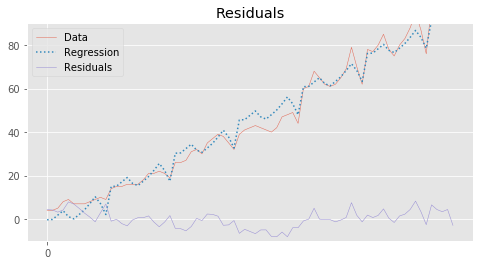

In [135]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()